In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.DataFrame({'K1':['one','two']*3+['two'], 'K2':[1,1,2,3,3,4,4]})

In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,K1,K2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [5]:
data['v1']=range(7)
data

,K1,K2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [6]:
data.drop_duplicates('K1')

,K1,K2,v1
0,one,1,0
1,two,1,1


In [7]:
data.drop_duplicates(['K1', 'K2'], keep='last')

,K1,K2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [8]:
data=pd.DataFrame({'food':['bacon','pork','bacon','beef','Bacon','ham'], 'ounces':[4,3,12,6,8,3]})
data

,food,ounces
0,bacon,4
1,pork,3
2,bacon,12
3,beef,6
4,Bacon,8
5,ham,3


In [9]:
meat_to_ani={'bacon':'pig', 'pork':'pig', 'beef':'cow', 'ham':'pig'}

In [10]:
lowercased=data.food.str.lower()
lowercased

0    bacon
1     pork
2    bacon
3     beef
4    bacon
5      ham
Name: food, dtype: object

In [11]:
data['animal']=lowercased.map(meat_to_ani)
data

,food,ounces,animal
0,bacon,4,pig
1,pork,3,pig
2,bacon,12,pig
3,beef,6,cow
4,Bacon,8,pig
5,ham,3,pig


In [12]:
data['food'].map(lambda x: meat_to_ani[x.lower()])

0    pig
1    pig
2    pig
3    cow
4    pig
5    pig
Name: food, dtype: object

In [13]:
data=pd.Series([1,-900,2,-999,-1000,3])
data

0       1
1    -900
2       2
3    -999
4   -1000
5       3
dtype: int64

In [14]:
data.replace(-900, np.nan)

0       1.0
1       NaN
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [15]:
data.replace([-900,-999], np.nan)
data.replace([-900,-999], [np.nan,0])
data.replace({-900:np.nan,-999:0})

0       1.0
1       NaN
2       2.0
3       0.0
4   -1000.0
5       3.0
dtype: float64

In [16]:
data=pd.DataFrame(np.arange(12).reshape(3, 4), index=['Seoul', 'Busan', 'Daejeon'], columns=['one','two','three','four'])
data

,one,two,three,four
Seoul,0,1,2,3
Busan,4,5,6,7
Daejeon,8,9,10,11


In [17]:
tf=lambda x: x[:5].upper()
data.index.map(tf)

Index(['SEOUL', 'BUSAN', 'DAEJE'], dtype='object')

In [18]:
data.rename(index=str.title, columns=str.upper, inplace=True)
data

,ONE,TWO,THREE,FOUR
Seoul,0,1,2,3
Busan,4,5,6,7
Daejeon,8,9,10,11


In [19]:
ages=[20,22,25,27,31,21,23,37,61,45,41,32]
bins=[18,25,35,60,100]
cats=pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (25, 35], ..., (35, 60], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [20]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [21]:
type(pd.value_counts(cats))
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [22]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [25, 35), ..., [35, 60), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [23]:
pd.cut(ages, bins, labels=['youth','young','middleAge', 'senior'])

[youth, youth, youth, young, young, ..., middleAge, senior, middleAge, middleAge, young]
Length: 12
Categories (4, object): [youth < young < middleAge < senior]

In [24]:
data=pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.079515,-0.040705,-0.031810,0.017939
std,1.005027,0.982529,0.979769,0.975455
min,-3.573915,-3.311770,-3.091941,-2.781440
25%,-0.740941,-0.721499,-0.656196,-0.634795
50%,-0.094289,-0.034090,-0.048869,0.021793
75%,0.572526,0.617670,0.572765,0.655623
max,3.048700,3.080794,3.273107,3.448755


In [25]:
data[(np.abs(data)>3).any(1)] # any함수 : 어느 하나라도 해당되면 전체를 출력

,0,1,2,3
20,0.896488,-3.311770,-0.114269,-0.101251
24,1.275823,-3.202771,-0.739466,-0.433257
28,1.544306,3.080794,0.858266,-0.436765
38,-1.347303,-0.450175,3.152576,0.302641
89,3.048700,-0.375556,2.078116,-0.038995
183,1.912851,-1.062762,3.273107,0.984882
221,-0.858457,1.443392,-0.502845,3.448755
507,-3.039332,-1.279008,1.343151,-0.143521
649,-3.573915,0.137886,1.429988,-1.309802
780,-2.461788,3.018700,0.403890,-0.178044


In [26]:
np.sign(data)

,0,1,2,3
0,-1.0,1.0,1.0,1.0
1,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,1.0
3,-1.0,1.0,-1.0,1.0
4,-1.0,1.0,1.0,1.0
...,...,...,...,...
995,1.0,-1.0,1.0,1.0
996,-1.0,-1.0,-1.0,1.0
997,-1.0,-1.0,1.0,-1.0
998,1.0,1.0,1.0,-1.0


In [27]:
data[np.abs(data)>3]=np.sign(data)*3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.078932,-0.040290,-0.032144,0.017490
std,1.002870,0.980594,0.978116,0.973977
min,-3.000000,-3.000000,-3.000000,-2.781440
25%,-0.740941,-0.721499,-0.656196,-0.634795
50%,-0.094289,-0.034090,-0.048869,0.021793
75%,0.572526,0.617670,0.572765,0.655623
max,3.000000,3.000000,3.000000,3.000000


In [28]:
df=pd.DataFrame(np.arange(5*4).reshape(5,4))
sampler=np.random.permutation(5)
sampler

array([2, 4, 1, 3, 0])

In [29]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
4,16,17,18,19
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


In [30]:
x=np.arange(10)
np.random.permutation(x)

array([3, 2, 1, 4, 8, 0, 5, 7, 6, 9])

In [31]:
ch=pd.Series([5,6,-1,4,3])
ch.sample(n=3)

4    3
2   -1
0    5
dtype: int64

In [32]:
np.random.seed(251)

In [33]:
x=np.random.rand(5)

In [34]:
np.random.shuffle(x)

In [35]:
x

array([0.07925806, 0.10301647, 0.63761123, 0.35231881, 0.26594666])

In [36]:
x=np.arange(10)

In [37]:
np.random.shuffle(x)
x

array([6, 1, 8, 7, 3, 5, 2, 0, 9, 4])

In [38]:
np.random.permutation(x)

array([0, 6, 2, 9, 3, 4, 8, 1, 7, 5])

In [39]:
x

array([6, 1, 8, 7, 3, 5, 2, 0, 9, 4])

In [40]:
np.random.choice(5, 3, replace=True, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 2, 3])

In [45]:
train=pd.read_csv("train.csv", parse_dates=['datetime'])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [42]:
pd.read_csv("test.csv")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [50]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [51]:
import missingno as msno

<AxesSubplot:>

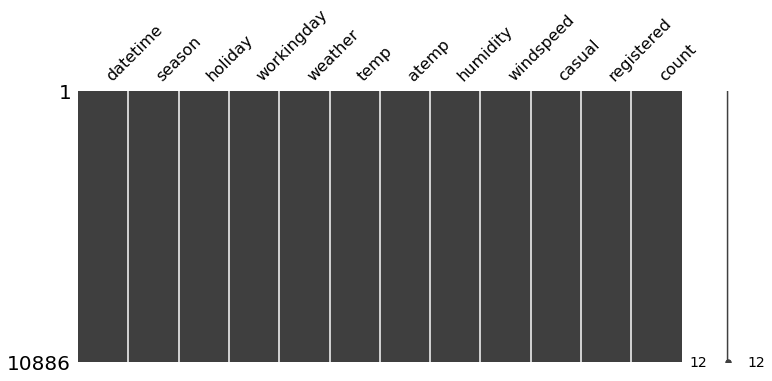

In [52]:
msno.matrix(train, figsize=(12,5))

In [54]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:title={'center':'시간별 대여량'}, xlabel='hour', ylabel='count'>

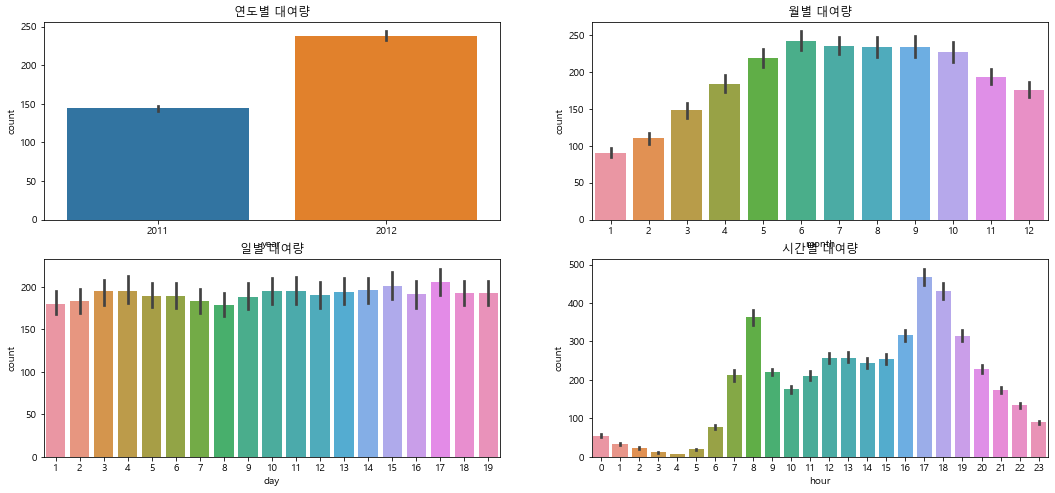

In [63]:
figure, ((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
ax1.set(ylabel='Count', xlabel='year', title='연도별 대여량')
ax2.set(ylabel='Count', xlabel='month', title='월별 대여량')
ax3.set(ylabel='Count', xlabel='day', title='일별 대여량')
ax4.set(ylabel='Count', xlabel='hour', title='시간별 대여량')

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

<AxesSubplot:title={'center':'근무일별 대여량'}, xlabel='workingday', ylabel='count'>

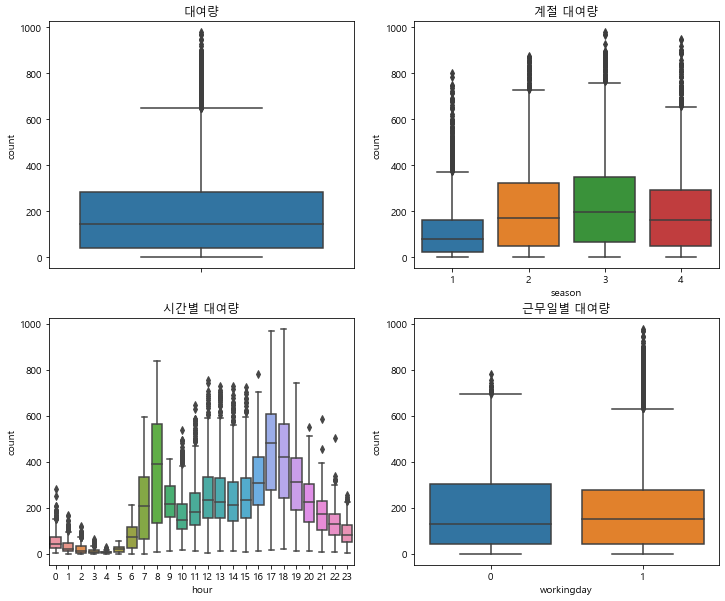

In [65]:
figure, ((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)
ax1.set(ylabel='Count', title='대여량')
ax2.set(ylabel='Count', xlabel='Season', title='계절 대여량')
ax3.set(ylabel='Count', xlabel='hour of the day', title='시간별 대여량')
ax4.set(ylabel='Count', xlabel='working day', title='근무일별 대여량')

sns.boxplot(data=train, y='count', orient='v', ax=ax1)
sns.boxplot(data=train, x='season', y='count', ax=ax2)
sns.boxplot(data=train, x='hour', y='count', ax=ax3)
sns.boxplot(data=train, x='workingday', y='count', ax=ax4)

In [66]:
train['dayofweek']=train['datetime'].dt.dayofweek
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

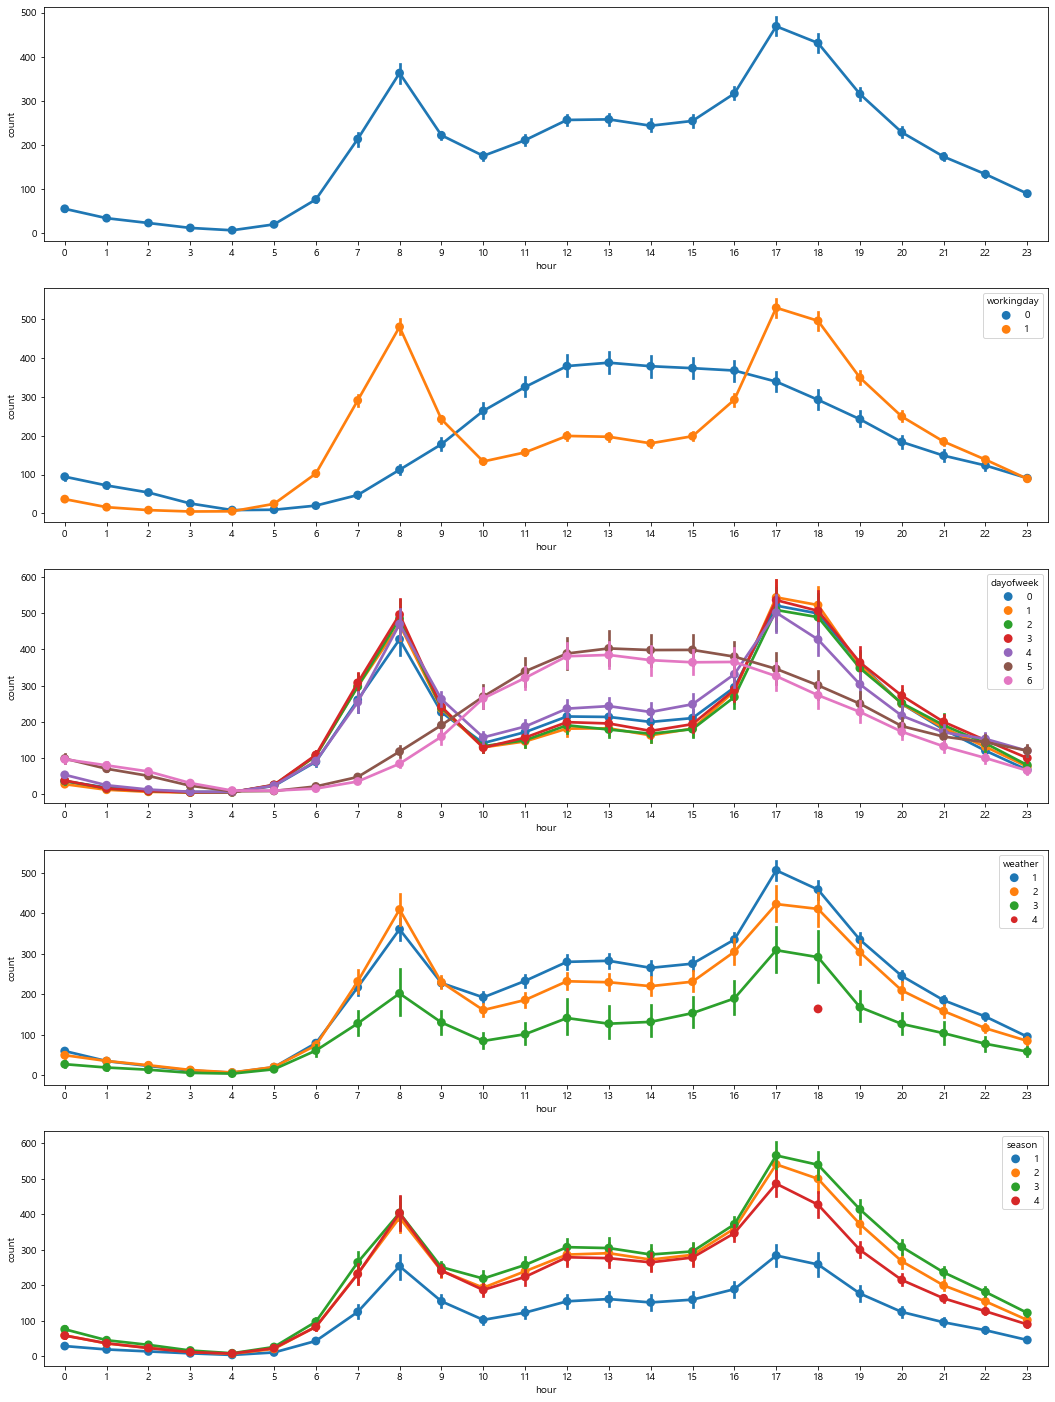

In [68]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [78]:
train.columns
corrMatt=train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt=corrMatt.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

<AxesSubplot:>

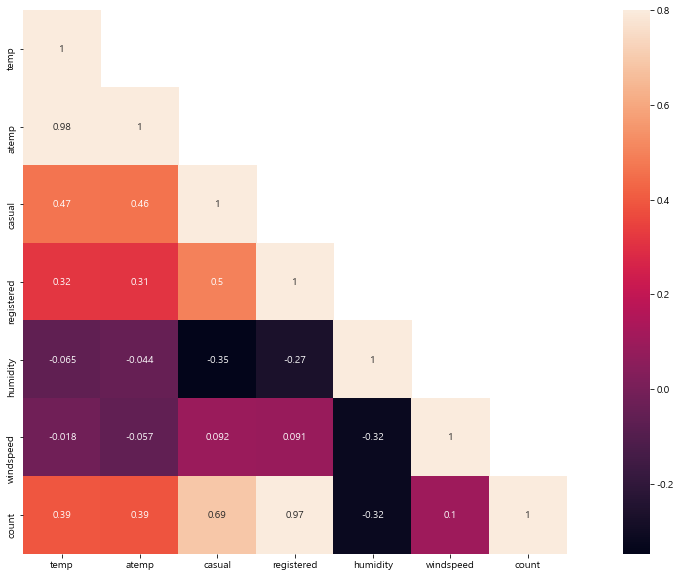

In [80]:
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, square=True, annot=True, vmax=0.8, mask=mask)

<AxesSubplot:xlabel='temp', ylabel='count'>

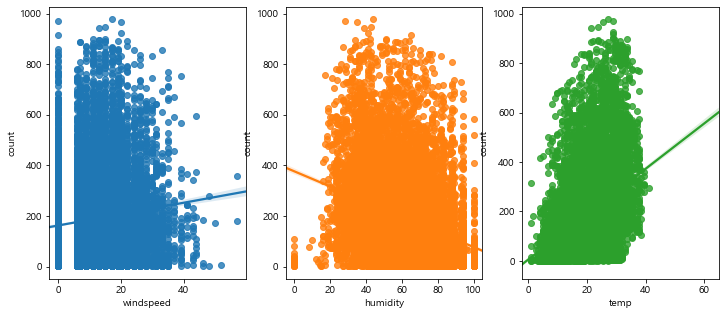

In [97]:
fig, (ax1, ax2, ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='windspeed', y='count', data=train, ax=ax1)
sns.regplot(x='humidity', y='count', data=train, ax=ax2)
sns.regplot(x='temp', y='count', data=train, ax=ax3)

In [94]:
len(train[train['windspeed']==0])

1313

<AxesSubplot:xlabel='ym', ylabel='count'>

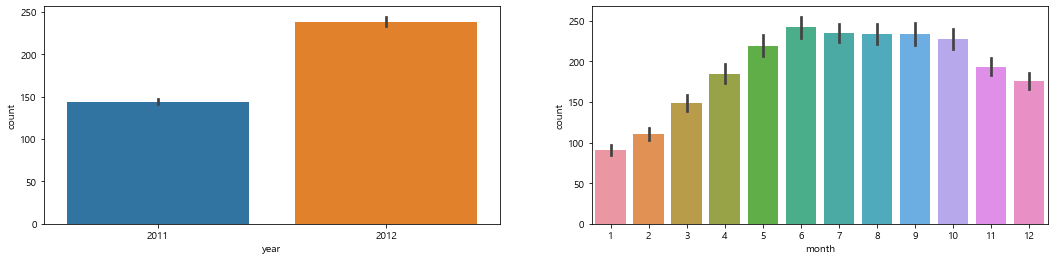

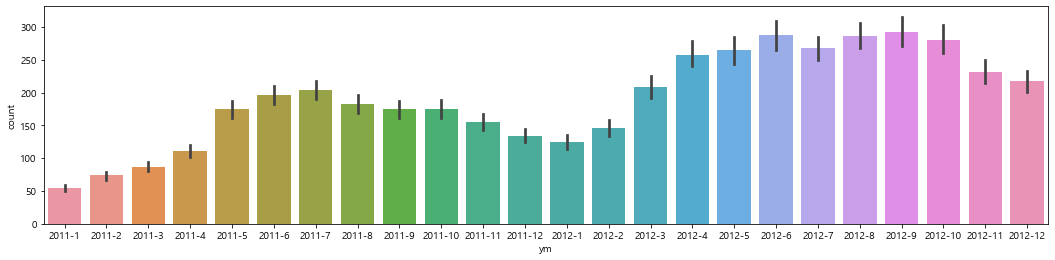

In [107]:
def cym(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
train['ym']=train['datetime'].apply(cym)
train[['datetime', 'ym']]

fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x='ym', y='count', ax=ax3)

In [115]:
3*train['count'].std()
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean())<=3*train['count'].std()]
print(trainWithoutOutliers.shape)
print(train.shape)

(10739, 18)
(10886, 18)
